In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

##### Add some EDA steps like scatterplot, pairplot, distplot, heatmap, outlier plot etc

### Shuffle and Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# since it is a linear regression which is a relationship between a single input variable and target variable hence I will select any one input variable
features = data[['TV']]
target = data[['sales']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .85, random_state = 10)

print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (170, 1)
Test set of features:  (30, 1)
Target for train:  (170, 1)
Target for test:  (30, 1)


In [7]:
X_train

,TV
160,131.7
40,228.0
77,27.5
92,28.6
36,290.7
...,...
114,209.6
65,131.1
16,195.4
126,87.2


### Learn the model on train data

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
my_model = LinearRegression()

In [13]:
# It gives me the function f in Y = f(X). The f here is my_model
my_model.fit(X_train, y_train)

LinearRegression()

#### Interpretation of model

In [14]:
#values of m and c learned in the gradient descent manner by the model
my_model.coef_, my_model.intercept_

(array([[0.04374346]]), array([7.31622549]))

Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .045 unit increase in Sales

OR 

An additional 1000 $ spent on TV was associated with an increase in sales of 45.523 units 

#### Evaluating model's parameters statistically

In [15]:
import statsmodels.formula.api as smf

In [16]:
my_stat_model = smf.ols(formula='sales ~ TV', data=data).fit()
my_stat_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

#### Prediction on new data

Suppose I want to know what value of sales will be associated if I spend 50,000$ in TV??

In [17]:
# y = mx + c
my_model.coef_ * 50  + my_model.intercept_

array([[9.50339851]])

In [18]:
my_model.predict([[50]])

array([[9.50339851]])

#### Plotting Best Fit line

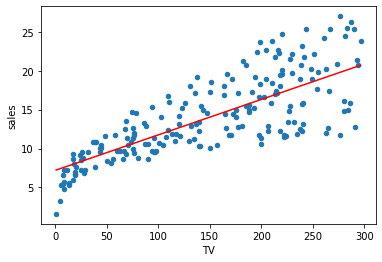

In [17]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
preds = my_model.predict(X_new)

data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new,preds,c='red');

### Test the model

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
y_pred = my_model.predict(X_test)

In [29]:
# Getting the MSE on train data
y_pred_train = my_model.predict(X_train)

mean_squared_error(y_pred_train, y_train)

9.868663061009483

In [25]:
# MAE

mean_absolute_error(y_pred, y_test)

3.095721364975426

In [21]:
# Compare with the true values, MSE

mean_squared_error(y_pred, y_test)

14.459872664611302

In [23]:
#RMSE
np.sqrt(mean_squared_error(y_pred, y_test))

3.8026139252639495